In [57]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as stats

In [ ]:
data = "data/total_data_clean.csv"
data_df = pd.read_csv(data)

In [ ]:
data_df
df = data_df.copy()

In [ ]:
# Creating non-covid dataframe - not including years 2020 & 2021

non_covid_df = df[(df.Year != 2020) & (df.Year != 2021)]

non_covid_df

In [ ]:
# Creating Covid-only DataFrame - years = 2020 & 2021
covid_df = df[(df.Year == 2020) | (df.Year == 2021)]
covid_df

The r-squared for covid years is: 0.6118250388480202
The p-value is for covid years: 1.3271620473431948e-63
The r-squared for non-covid years is: 0.5479186561545948
The p-value is for non-covid years: 8.204516086443966e-162


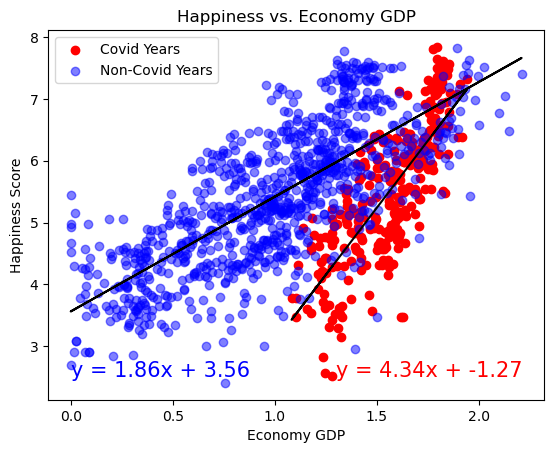

In [55]:
# Plot out covid years
x_cov = covid_df['Economy_GDP'] / 6
#divide this by 6 to normalize because the scale on the covid data is 6 times greater than non-covid
y_cov = covid_df['Happiness_Score']
plt.scatter(x_cov,y_cov,color='r',label = "Covid Years" )
#plot out noncovid years
x_ncov = non_covid_df['Economy_GDP'] 
y_ncov = non_covid_df['Happiness_Score']
plt.scatter(x_ncov,y_ncov,color='b',alpha = .5, label = "Non-Covid Years")


#linear regression for covid
(slope, intercept, rvalue1, pvalue1, stderr) = linregress(x_cov, y_cov)
regress_values_covid = x_cov * slope + intercept
line_eq_cov = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_cov,regress_values_covid,"k-")
plt.annotate(line_eq_cov,(1.30,2.5),fontsize=15,color="r")
print(f"The r-squared for covid years is: {rvalue1**2}")
print(f"The p-value is for covid years: {pvalue1}")

#linear regression for noncovid
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_ncov, y_ncov)
regress_values_noncovid = x_ncov * slope + intercept
line_eq_ncov = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_ncov,regress_values_noncovid,"k-")
plt.annotate(line_eq_ncov,(0,2.5),fontsize=15,color="b")
print(f"The r-squared for non-covid years is: {rvalue**2}")
print(f"The p-value is for non-covid years: {pvalue}")

plt.xlabel('Economy GDP')
plt.ylabel('Happiness Score')
plt.title('Happiness vs. Economy GDP')
plt.legend()
plt.show()

In [59]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(x_cov.mean(), x_ncov.mean(), equal_var=False)

C:\Users\fergu\AppData\Local\Temp\ipykernel_24700\2561558745.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(x_cov.mean(), x_ncov.mean(), equal_var=False)


Ttest_indResult(statistic=nan, pvalue=nan)